In [263]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [264]:
def init_infection_dataframe_from_zip(path, index_col):
    df_master = pd.read_csv(glob.glob(path)[0], compression='zip', header=0, sep=',', index_col=index_col)
    return df_master

infected_df = init_infection_dataframe_from_zip(r'**csv_files/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv.zip', ["submission_date", "state"])

In [265]:
infected_df.index = infected_df.index.set_levels([pd.to_datetime(infected_df.index.levels[0]), infected_df.index.levels[1]])
infected_df.sort_index()

tot_cases  conf_cases  prob_cases  new_case  pnew_case  \
submission_date state                                                           
2020-01-22      AK             0         NaN         NaN         0        NaN   
                AL             0         0.0         0.0         0        0.0   
                AR             0         NaN         NaN         0        NaN   
                AS             0         NaN         NaN         0        NaN   
                AZ             0         NaN         NaN         0        NaN   
...                          ...         ...         ...       ...        ...   
2022-04-18      VT        111815         NaN         NaN       973       56.0   
                WA       1477863         NaN         NaN      3315      360.0   
                WI       1596614   1402990.0    193624.0      1674      138.0   
                WV        499193    395875.0    103318.0       303       99.0   
                WY        156258    123253.0     33005.0         0        0.0   

                       tot_death  conf_death  prob_death  new_death  \
submission_date state                                                 
2020-01-22      AK             0         NaN         NaN          0   
                AL             0         0.0         0.0          0   
                AR             0         NaN         NaN          0   
                AS             0         NaN         NaN          0   
                AZ             0         NaN         NaN          0   
...                          ...         ...         ...        ...   
2022-04-18      VT           593         NaN         NaN          0   
                WA         12626         NaN         NaN          7   
                WI         14391     12862.0      1529.0          1   
                WV          6796         NaN         NaN          2   
                WY          1801      1801.0         0.0          0   

                       pnew_death              created_at consent_cases  \
submission_date state                                                     
2020-01-22      AK            NaN  03/26/2020 04:22:39 PM           NaN   
                AL            0.0  01/24/2020 12:00:00 AM         Agree   
                AR            NaN  03/26/2020 04:22:39 PM     Not agree   
                AS            NaN  03/26/2020 04:22:39 PM           NaN   
                AZ            NaN  03/26/2020 04:22:39 PM         Agree   
...                           ...                     ...           ...   
2022-04-18      VT            0.0  04/19/2022 01:21:35 PM     Not agree   
                WA            0.0  04/19/2022 01:21:35 PM           NaN   
                WI            0.0  04/19/2022 01:21:35 PM         Agree   
                WV            1.0  04/19/2022 01:21:35 PM         Agree   
                WY            0.0  04/19/2022 01:21:35 PM         Agree   

                      consent_deaths  
submission_date state                 
2020-01-22      AK               NaN  
                AL             Agree  
                AR         Not agree  
                AS               NaN  
                AZ             Agree  
...                              ...  
2022-04-18      VT         Not agree  
                WA               NaN  
                WI             Agree  
                WV         Not agree  
                WY             Agree  

[49080 rows x 13 columns]

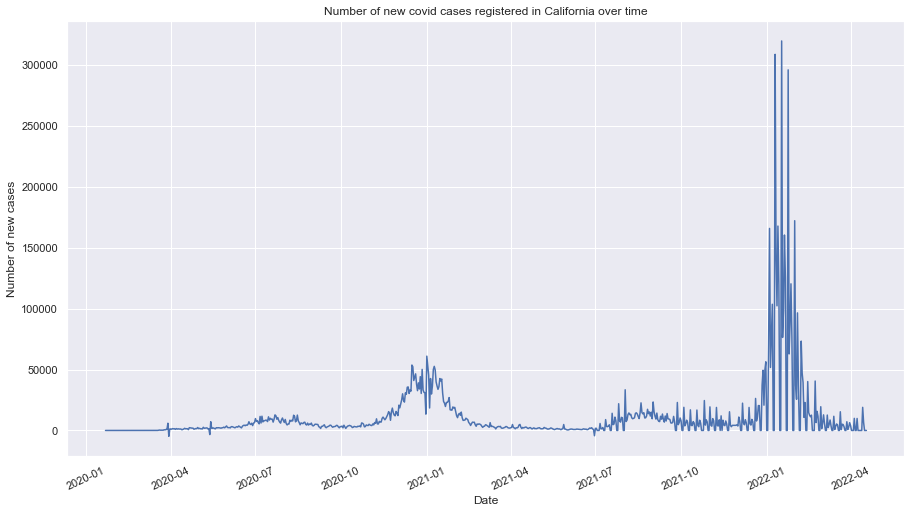

In [266]:
sns.set(rc = {'figure.figsize':(15,8)})
#sns.lineplot(x = "submission_date", y = "tot_cases", data = infected_df)
plot = sns.lineplot(x = "submission_date", y = "new_case", data = infected_df[infected_df.index.get_level_values('state').isin(['CA'])])
plot.set(xlabel='Date', ylabel='Number of new cases')
plot.set_title('Number of new covid cases registered in California over time');
plt.xticks(rotation = 25);

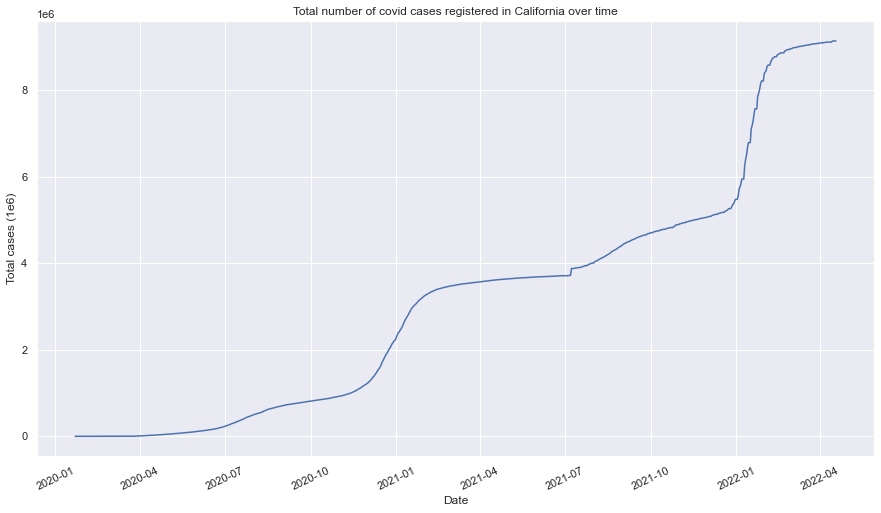

In [267]:
sns.set(rc = {'figure.figsize':(15,8)})
#sns.lineplot(x = "submission_date", y = "tot_cases", data = infected_df)
plot = sns.lineplot(x = "submission_date", y = "tot_cases", data = infected_df[infected_df.index.get_level_values('state').isin(['CA'])])
plot.set(xlabel='Date', ylabel='Total cases (1e6)')
plot.set_title('Total number of covid cases registered in California over time');
plt.xticks(rotation = 25);